In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [43]:
seed = 1 # 1 or 10


x_m, y_m = make_classification(n_samples=60000, n_features=10, n_redundant=2, weights=[0.6], random_state=seed)
x_f, y_f = make_classification(n_samples=15000, n_features=10, n_redundant=2, weights=[0.4], random_state=seed)
m = np.array([[0] for _ in range(60000)])
f = np.array([[1] for _ in range(15000)])

In [44]:
m_join = np.append(x_m, m, axis=1)
m_join = np.append(m_join, np.expand_dims(y_m, axis=1), axis=1)

f_join = np.append(x_f, f, axis=1)
f_join = np.append(f_join, np.expand_dims(y_f, axis=1), axis=1)

join = np.append(m_join, f_join, axis=0)
np.random.seed = seed
np.random.shuffle(join)

headers = ''
for i in range(1, 11):
    headers += '"x' + str(i) + '",'
headers += '"a","y"'
np.savetxt("data.csv", join, delimiter=',', header=headers, comments='')
# print(np.unique(y_m, return_counts= True))

In [45]:
df = pd.read_csv("data.csv")

In [46]:
# df.drop(["ID"], axis=1, inplace=True)
# df.dropna(axis=0, inplace=True)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,a,y
0,0.552065,0.678726,0.110961,0.010939,0.640737,-2.017175,-1.114657,0.208275,0.208144,0.333199,0.0,1.0
1,-0.672816,-0.897232,-0.095256,-0.636415,1.292033,0.437829,0.840920,0.891835,-2.678521,2.501781,0.0,0.0
2,-1.457580,-2.292518,-0.007340,0.439197,-1.536629,0.587012,-0.754940,0.191784,0.393247,-1.780896,0.0,0.0
3,-0.933335,-1.552169,0.043347,1.312077,-1.010135,0.128617,-1.105462,0.007891,0.726537,0.822828,0.0,0.0
4,-1.228983,-1.610175,-0.190395,0.298006,-2.532257,0.384794,1.748327,1.272963,0.962313,0.943935,0.0,0.0


In [47]:
# df["SEX"].value_counts()
#
# df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
#
# df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])
#
# def age(x):
#     if x in range(21,41):
#         return 1
#     elif x in range(41,61):
#         return 2
#     elif x in range(61,80):
#         return 3
#
# df['AGE']=df['AGE'].apply(age)

In [48]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [49]:
model = LogisticRegression(solver="lbfgs", random_state=seed)
# model = DecisionTreeClassifier()
model.fit(x_train, y_train)

comb = x_test.join(y_test)
comb.head()

sex_1 = comb.loc[comb['a'] == 0]
sex_2 = comb.loc[comb["a"] == 1]
#
x_1 = sex_1.iloc[:, :-1]
y_1 = sex_1.iloc[:, -1]

x_2 = sex_2.iloc[:, :-1]
y_2 = sex_2.iloc[:, -1]


# y_test_m = y_test.loc[y_test["SEX"] == 1]
# y_test_f = y_test.loc[y_test["SEX"] == 2]

p_1 = model.predict_proba(x_1)[: ,1] # only keep positive results
p_2 = model.predict_proba(x_2)[: ,1] # only keep positive results

In [50]:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

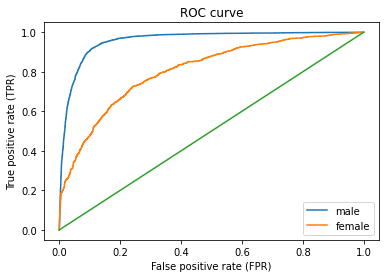

In [51]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
# plt.fill_between(fpr_1.sample(1000), (tpr_1.sample(1000)), fpr_2.sample(1000),tpr_2.sample(1000), alpha=0.3)
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

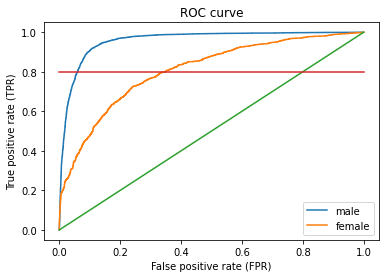

In [52]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

In [95]:
p_corrected = []
for i in p_1:
    rand = random.random()
    if rand > 0.805:
        p_corrected.append(0)
    else:
        p_corrected.append(i)
        
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_corrected)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

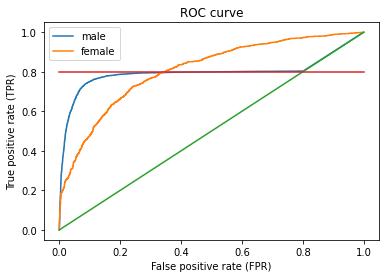

In [96]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

In [103]:
p_corrected = []
for i in p_1:
    rand = random.random()
    if rand > 0.3 and i < 0.8:
        p_corrected.append(0)
    else:
        p_corrected.append(i)
        
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_corrected)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

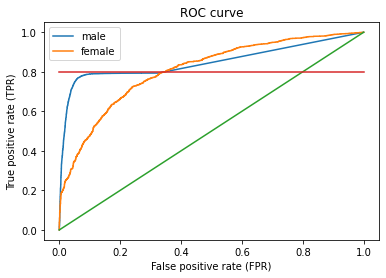

In [104]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()